In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from dateutil.parser import parse
from IPython.display import display, HTML


display(HTML("<style>.container { width:90% !important; }</style>"))

# Data Extraction

In [2]:
df = pd.read_csv(filepath_or_buffer = "training.1600000.processed.noemoticon.csv", 
                 encoding = "ISO-8859-1", 
                 names = ["sentiment", "ids", "date", "flag", "user", "text"])

In [3]:
df.shape

(1600000, 6)

In [4]:
df.head()

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# Data Cleaning

#### Change labels to binary format

In [5]:
df.sentiment.replace({4:1}, inplace=True)

In [52]:
# 1 = positive
# 0 = negative

df.sentiment.value_counts()

1    800000
0    800000
Name: sentiment, dtype: int64

#### Extract Dates for analysis

In [7]:
# date functions
month_map = {
    "Jan":"01",
    "Feb":"02",
    "Mar":"03",
    "Apr":"04",
    "May":"05",
    "Jun":"06",
    "Jul":"07",
    "Aug":"08",
    "Sep":"09",
    "Oct":"10",
    "Nov":"11",
    "Dec":"12",
}

def extract_year(string):
    return re.search('(\d{4})', string).group()

def extract_time(string):
    return re.search('(?:[01]\d|2[0123]):(?:[012345]\d):(?:[012345]\d)', string).group()

def extract_day(string):
    return string.split()[0]

def extract_date(string, month_map = month_map):    
    year = extract_year(string)
    date = string.split()[:3]
    return year + '-' + month_map[date[1]] + '-' + date[2]

def extract_datetime(string, month_map = month_map):
    date = extract_date(string)
    time = extract_time(string)
    return date + " " + time

In [8]:
df.rename(index=str, columns={"date":"date_old"}, inplace=True)

df['datetime'] = df.date_old.apply(lambda x: extract_datetime(x))
df['time'] = df.date_old.apply(lambda x: extract_time(x))
df['date'] = df.date_old.apply(lambda x: extract_date(x))
df['day']  = df.date_old.apply(lambda x: extract_day(x))

df.drop(['date_old', 'flag', 'ids'], axis=1, inplace=True)

In [9]:
df.head()

,sentiment,user,text,datetime,time,date,day
0,0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009-04-06 22:19:45,22:19:45,2009-04-06,Mon
1,0,scotthamilton,is upset that he can't update his Facebook by ...,2009-04-06 22:19:49,22:19:49,2009-04-06,Mon
2,0,mattycus,@Kenichan I dived many times for the ball. Man...,2009-04-06 22:19:53,22:19:53,2009-04-06,Mon
3,0,ElleCTF,my whole body feels itchy and like its on fire,2009-04-06 22:19:57,22:19:57,2009-04-06,Mon
4,0,Karoli,"@nationwideclass no, it's not behaving at all....",2009-04-06 22:19:57,22:19:57,2009-04-06,Mon


# Data Exploration

In [10]:
df_pos = df[df.sentiment==1]
df_neg = df[df.sentiment==0]

In [11]:
# Tweets are between  April 6, 2009 to June 25, 2009.

df.datetime.min(), df.datetime.max()

('2009-04-06 22:19:45', '2009-06-25 10:28:31')

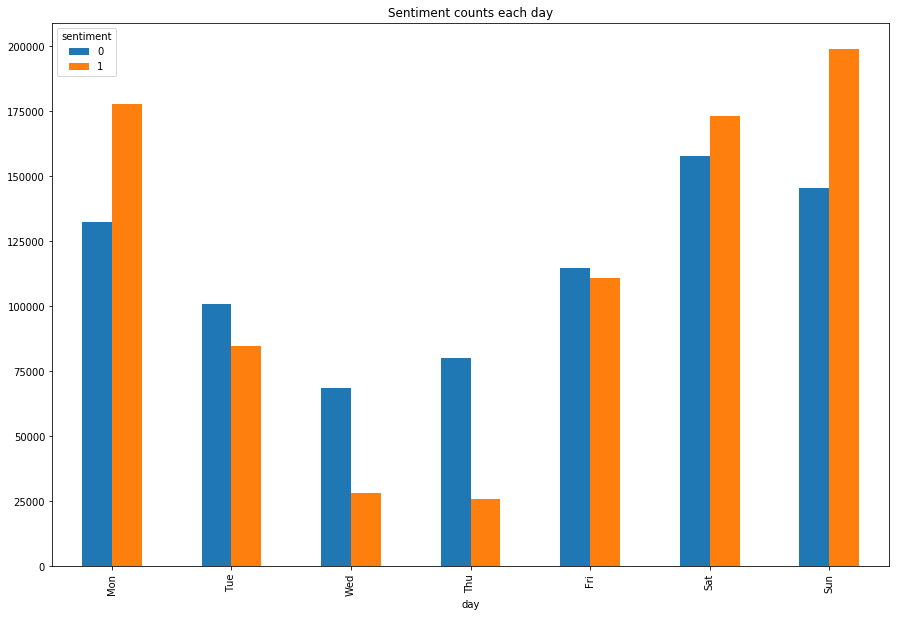

In [68]:
index=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
pd.crosstab(df['day'],df['sentiment']).reindex(index).plot.bar(title='Sentiment counts each day', figsize=(15, 10))

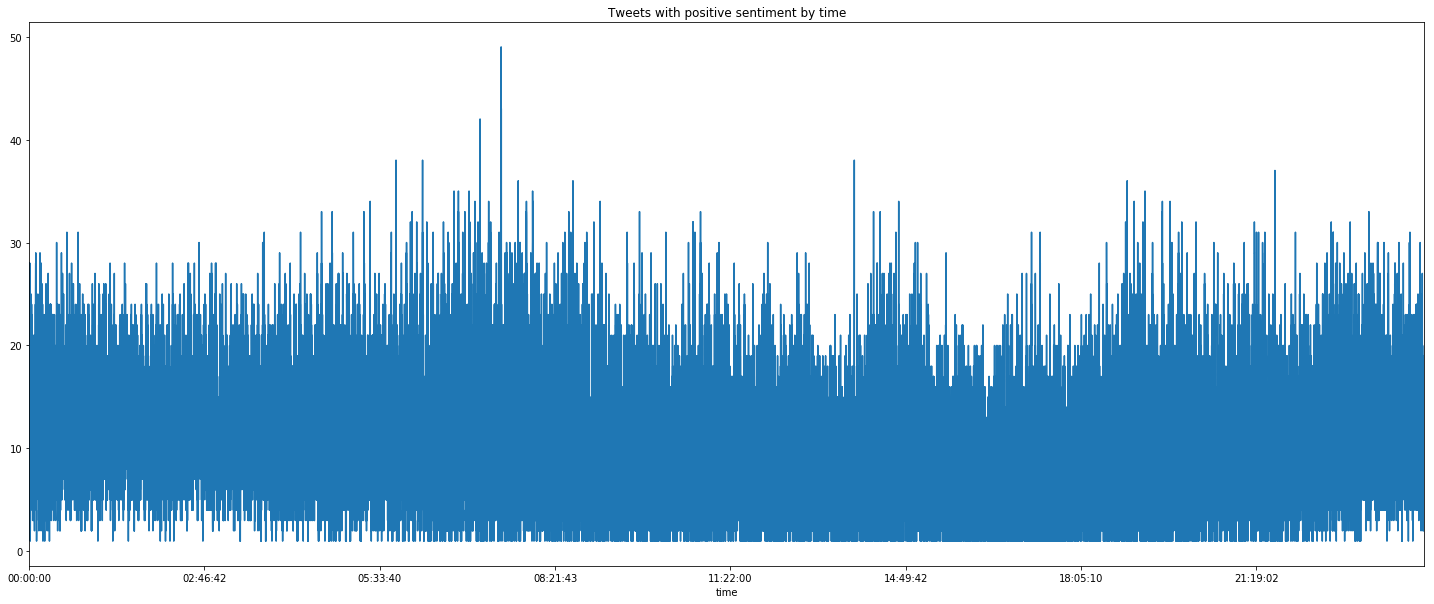

In [71]:
df_pos.groupby('time').sentiment.count().plot(figsize=(25, 10), title='Tweets with positive sentiment by time')

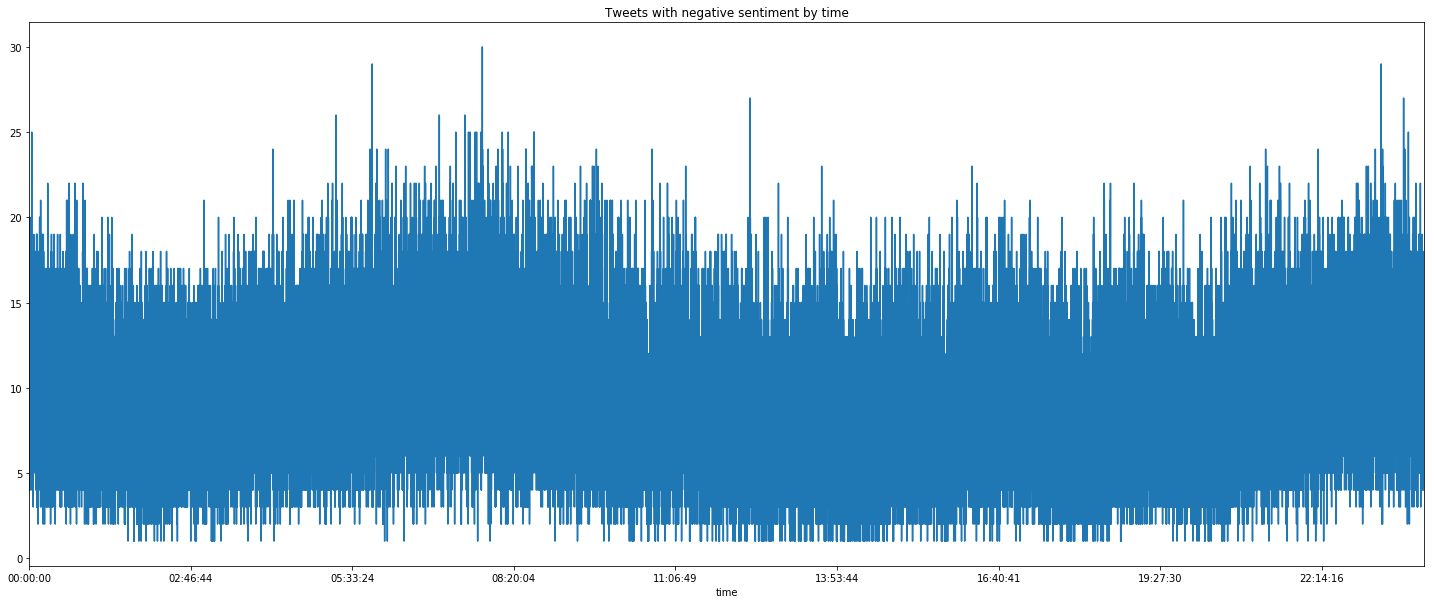

In [70]:
df_neg.groupby('time').sentiment.count().plot(figsize=(25, 10), title='Tweets with negative sentiment by time')

# Text processing

# Modelling

# Deep Learning

# Evaluation